# readme
descrip: preprocess for regriding 

update history: <br>
v1.0 DL 2021Apr06 <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe
# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

preprocess for Sunway HR UVEL, VVEL: average 1991-2001, 2041-2051, 2091-2100

In [2]:
infile0_TH = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/'
              'monthly/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_TH = xr.open_dataset(infile0_TH)
ds0_TH

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 1850-02-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/94)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
    TMXL                (time, nlat, nlon) float32 ...
    HBLT                (time, nlat, nlon) float32 ...
    XBLT                (time, nlat, nlon) float32 ...
    TBLT                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-29 at 17:54:15.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0

In [4]:
indir_TH = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
         'data_after_manipulation/UVVEL/SunwayMonthlyTransientHR/original/')
infile1_u_TH=indir_TH+'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1950-2005_UVEL_2021Apr07.nc'
infile1_v_TH=indir_TH+'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1950-2005_VVEL_2021Apr07.nc'
ds1_u_TH = xr.open_dataset(infile1_u_TH)
ds1_v_TH = xr.open_dataset(infile1_v_TH)

ds1_v_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 56, z_t: 1)
Coordinates:
    ULAT        (nlat, nlon) float64 ...
    ULONG       (nlat, nlon) float64 ...
  * time        (time) object 1950-07-16 21:59:59.999997 ... 2005-07-16 21:59...
  * z_t         (z_t) float32 500.0
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    VVEL        (time, z_t, nlat, nlon) float32 ...
    time_bound  (time, d2) object ...
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       Wed Apr  7 08:10:54 2021: ncra --mro -d time,,,12,12 B.E.1...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-01-25 at 15:43:24.0
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  22795331
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [4]:
infile2_u_TH=indir_TH+'2039_2051/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.203901-205112_UVEL_2021Apr06.nc'
infile2_v_TH=indir_TH+'2039_2051/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.203901-205112_VVEL_2021Apr06.nc'
ds2_u_TH = xr.open_dataset(infile2_u_TH)
ds2_v_TH = xr.open_dataset(infile2_v_TH)
ds2_v_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 156, z_t: 1)
Coordinates:
    ULAT        (nlat, nlon) float64 ...
    ULONG       (nlat, nlon) float64 ...
  * time        (time) object 2039-02-01 00:00:00 ... 2052-01-01 00:00:00
  * z_t         (z_t) float32 500.0
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    VVEL        (time, z_t, nlat, nlon) float32 ...
    time_bound  (time, d2) object ...
Attributes:
    title:         B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF
    history:       Tue Apr  6 16:22:01 2021: ncrcat -v VVEL B.E.13.BRCP85C5CN...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-05-01 at 22:20:05.4
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  7535411
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [13]:
infile3_u_TH=indir_TH+'2053_2100/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.205301-210012_UVEL_2021Apr06.nc'
infile3_v_TH=indir_TH+'2053_2100/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.205301-210012_VVEL_2021Apr06.nc'
ds3_u_TH = xr.open_dataset(infile3_u_TH)
ds3_v_TH = xr.open_dataset(infile3_v_TH)
ds3_v_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 576, z_t: 1)
Coordinates:
    ULAT        (nlat, nlon) float64 ...
    ULONG       (nlat, nlon) float64 ...
  * time        (time) object 2053-02-01 00:00:00 ... 2101-01-01 00:00:00
  * z_t         (z_t) float32 500.0
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    VVEL        (time, z_t, nlat, nlon) float32 ...
    time_bound  (time, d2) object ...
Attributes:
    title:         B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF
    history:       Tue Apr  6 16:35:25 2021: ncrcat -v VVEL B.E.13.BRCP85C5CN...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-05-10 at 17:33:51.4
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  10724051
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [26]:
UVEL1_TH = ds1_u_TH.UVEL.sel(time=slice('1991','2000')).squeeze('z_t') # remove z_t dim, length of 1 dimen 
# UVEL2_TH = ds2_u_TH.UVEL.sel(time=slice('2041','2050')).squeeze('z_t').mean('time')
# UVEL3_TH = ds3_u_TH.UVEL.sel(time=slice('2091','2100')).squeeze('z_t').mean('time')
UVEL1_TH

<xarray.DataArray 'UVEL' (nlat: 2400, nlon: 3600)>
array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

In [ ]:
xr.concatat([UVEL1_TH, UVEL2_TH])

In [6]:
UVEL1av_TH = UVEL1_TH.mean('time').where(ds0_TH.KMU>0,np.nan).rename('UVEL')
UVEL1av_TH

<xarray.DataArray 'UVEL' (nlat: 2400, nlon: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

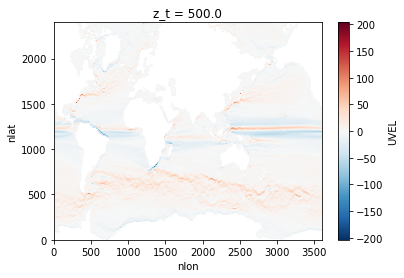

In [7]:
UVEL1av_TH.plot()
UVEL2_TH.mean('time').plot()

In [15]:
DUVEL1_TH = (UVEL2_TH.mean('time') - UVEL1_TH.mean('time')).where(ds0_TH.KMU>0,np.nan).rename('DUVEL1')
DUVEL2_TH = (UVEL3_TH.mean('time') - UVEL1_TH.mean('time')).where(ds0_TH.KMU>0,np.nan).rename('DUVEL2')
DUVEL2_TH

<xarray.DataArray 'DUVEL2' (nlat: 2400, nlon: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    ULAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    ULONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    z_t      float32 500.0
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

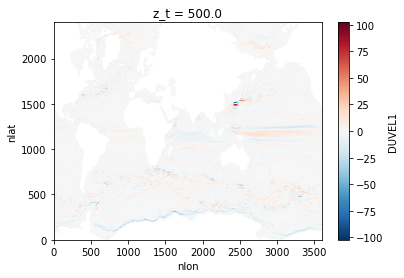

In [12]:
DUVEL1_TH.plot()
DUVEL2_TH.plot()

In [27]:
ds_out = xr.merge([UVEL1av_TH,DUVEL1_TH,DUVEL2_TH])
# ds_out = ds_out.assign_coords(ULONG=ds0_TH.ULONG)
ds_out

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600)
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    ULAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    TLONG    (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    TLAT     (nlat, nlon) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
Dimensions without coordinates: nlat, nlon
Data variables:
    UVEL     (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    DUVEL1   (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    DUVEL2   (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [29]:
ds0_TH.ULONG.values

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [30]:
outdir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
          'data_after_manipulation/UVVEL/SunwayMonthlyTransientHR/')
outfile= outdir +'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.UVELDUVEL_test_2021Apr07.nc'
ds_out.to_netcdf(path=outfile, mode='w', format='NETCDF4', compute=True) 

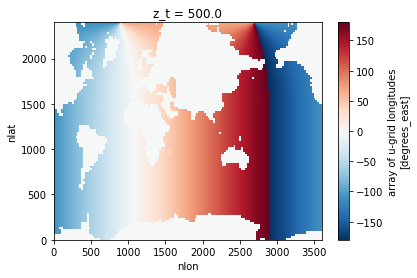

In [25]:
ds_out.ULONG.plot()

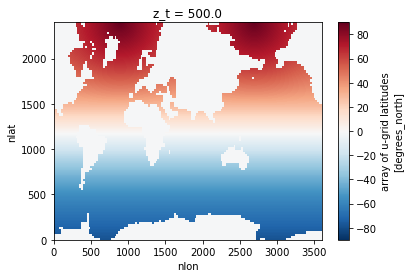

In [23]:
ds_out.ULAT.plot()

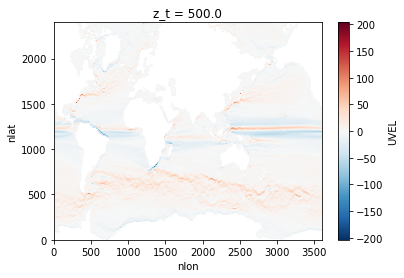

In [19]:
ds_out.UVEL.plot()

In [7]:
indir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/SunwayMonthlyTransientHR/'
# infile = indir+ 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100.regrid_2021Apr05.nc'
infile = indir+ 'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.UVELDUVEL_test_2021Apr07.nc'

ds = xr.open_dataset(infile)
ds

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600)
Coordinates:
    z_t      float32 ...
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    UVEL     (nlat, nlon) float32 ...
    DUVEL1   (nlat, nlon) float32 ...
    DUVEL2   (nlat, nlon) float32 ...

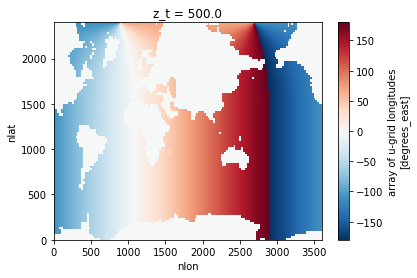

In [9]:
ds.ULONG.plot()

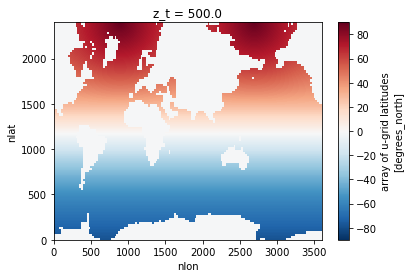

In [10]:
ds.ULAT.plot()